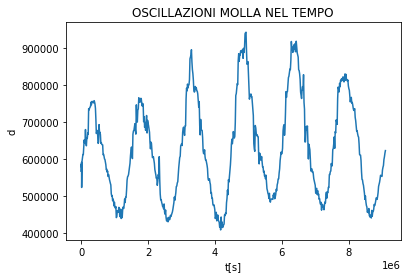

In [1]:
#Import libraries
import serial
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Speed of sound [m/s]
c = 343 

#Port
port = '/dev/cu.usbmodem101'
usb = serial.Serial(port)
f = open('arduinoB1_6', 'w')
f.write('Time,Tau\n')

#Number of values you want to plot 
Nmax = 1000

n = 0
#While loop over n
while(n < Nmax):
    #Read data from the Serial Monitor
    arduino = usb.readline().rstrip()
    
    #If you want to print on terminal the values of t, tau and the relative number of n:
    #print(n, arduino.decode())
    
    #Print on file in format: time,tau
    f.write('{}\n'.format(arduino.decode()))

    n = n+1

#Dataframe with values read from serial monitor
df = pd.read_csv('arduinoB1_6')

#Time
t = df['Time'].to_numpy()

#Distance 
tau = df['Tau'].to_numpy()
d = c*tau

#Plot distance versus time
plt.title('OSCILLAZIONI MOLLA NEL TEMPO')
plt.xlabel('t[s]')
plt.ylabel('d')
#plt.xlim(0.8*10**8, 0.9*10**8)
plt.plot(t, d)
plt.show()